# Implementing and Testing snippets for Streamlit App
## Imports

In [1]:
import re
import importlib

from sklearn.datasets import load_iris, load_wine
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier \
    # HistGradientBoostingClassifier, AdaBoostClassifier
# from sklearn.linear_model import RidgeClassifier, LogisticRegression, Lasso
from sklearn.inspection import DecisionBoundaryDisplay

import multiclass_proba_contour as mpc
importlib.reload(mpc)

<module 'multiclass_proba_contour' from 'c:\\Users\\Semyon\\Documents\\Python\\20_Projects\\mpc_clone\\multiclass-proba-contour_new\\multiclass_proba_contour.py'>

## Datasets
User ought to be given three options:
1.  Pick one of the available toy data sets
2.  Generate synthetic data set
3.  Upload their own (must be preprocessed)

Upon data set selection/upload, user ought to be able to chose two features to be used for model training and plotting. Features must be numeric, (perferably) continuous variables.
### Toy Datasets
The easiest option. The available classification sets are nice and tidy.

In [2]:
data = load_wine(as_frame=True)

In [3]:
target_names_map = {
    k:v for k, v in zip(
        range(len(data["target"].unique())), data["target_names"]
        )
    }
data["target"] = data["target"].map(target_names_map)

## Classifier Models
Got to generalise it: as an option, can explore ALL sklearn classifiers, find an intersection of all keyword arguments and define custom widgets for each keyword argument.

Upon data set and model selection, `ProbaVis` instance should be created. Data set, model and ProbaVis ought to be cashed to prevent unnesessary reruns.

In [4]:
isinstance(RandomForestClassifier(), RandomForestClassifier)

True

In [5]:
# bool(RandomForestClassifier())  # AttributeError

Prune the classifier documentation to obtain its and parameter description.

In [6]:
# include parameter names in pattern
model = RandomForestClassifier()
params = model.get_params().keys()
params = [p + " : " for p in params]
params = "|".join(params)
params = re.compile(params)

In [14]:
RandomForestClassifier().__doc__ .split("\n\n")[1]

'    A random forest is a meta estimator that fits a number of decision tree\n    classifiers on various sub-samples of the dataset and uses averaging to\n    improve the predictive accuracy and control over-fitting.\n    The sub-sample size is controlled with the `max_samples` parameter if\n    `bootstrap=True` (default), otherwise the whole dataset is used to build\n    each tree.'

In [8]:
params_desc = [x for x in re.split("\n\n    | ----------\n    ", model.__doc__) if params.search(x)]
params_desc = {x.split(" : ")[0]: x.split(" : ")[1] for x in params_desc}
params_desc

{'n_estimators': 'int, default=100\n        The number of trees in the forest.',
 'criterion': '{"gini", "entropy", "log_loss"}, default="gini"\n        The function to measure the quality of a split. Supported criteria are\n        "gini" for the Gini impurity and "log_loss" and "entropy" both for the\n        Shannon information gain, see :ref:`tree_mathematical_formulation`.\n        Note: This parameter is tree-specific.',
 'max_depth': 'int, default=None\n        The maximum depth of the tree. If None, then nodes are expanded until\n        all leaves are pure or until all leaves contain less than\n        min_samples_split samples.',
 'min_samples_split': 'int or float, default=2\n        The minimum number of samples required to split an internal node:',
 'min_samples_leaf': 'int or float, default=1\n        The minimum number of samples required to be at a leaf node.\n        A split point at any depth will only be considered if it leaves at\n        least ``min_samples_leaf`` 

In [9]:
print((len(params_desc.keys())))
print(len(set(model.get_params().keys())))
# set(params_desc.keys()).symmetric_difference(set(model.get_params().keys()))

18
18


## MPC Improvements
*   Will it be faster to use `np.vectorise` to get grid probabilities?
*   Put as much code as you can into `__init__` to speed up plottting (e.g., utilities)

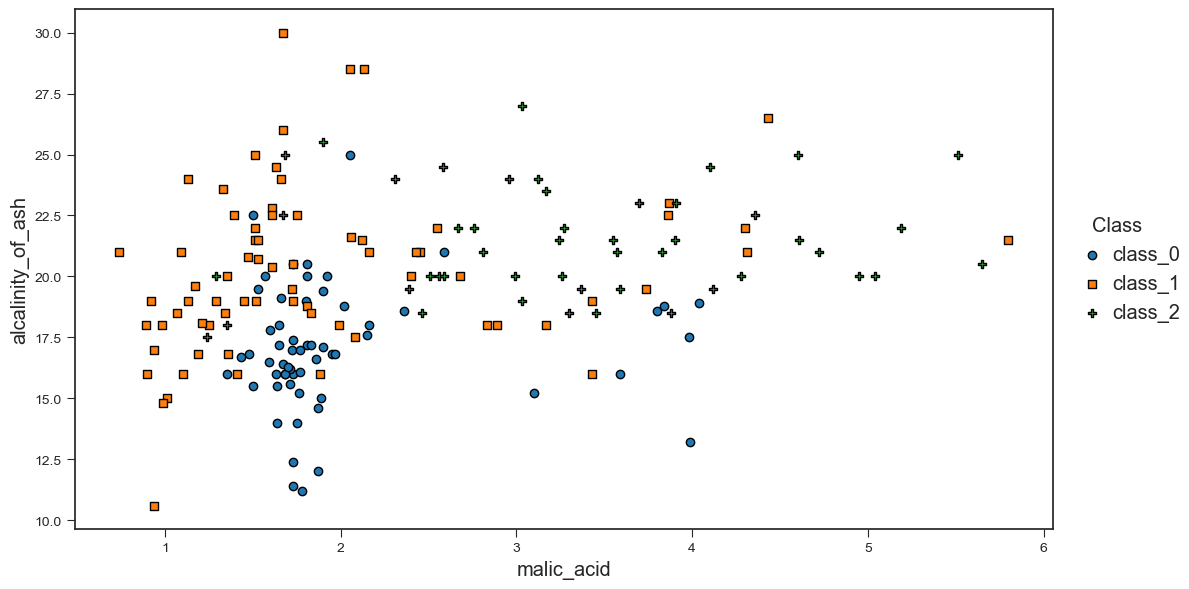

In [10]:
mpc.ProbaVis("-", data["data"], data["target"], [1,3]).plot(contour_on=False)


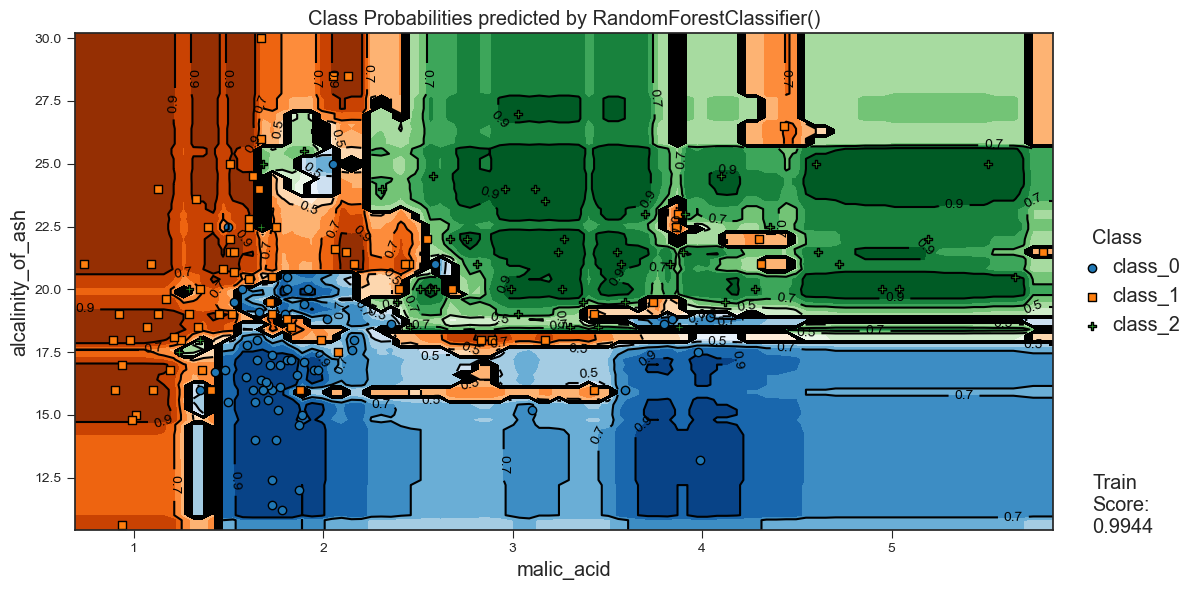

In [11]:
mpc_ = mpc.ProbaVis(RandomForestClassifier(), data["data"], data["target"], [1,3])
mpc_.plot()

Check the sklearn's own utility module on boundary plotting.

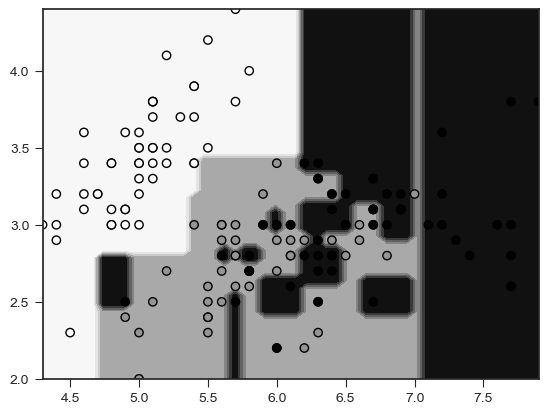

In [12]:
# https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/inspection/_plot/decision_boundary.py
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
feature_1, feature_2 = np.meshgrid(
    np.linspace(iris.data[:, 0].min(), iris.data[:, 0].max()),
    np.linspace(iris.data[:, 1].min(), iris.data[:, 1].max())
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
tree = DecisionTreeClassifier().fit(iris.data[:, :2], iris.target)
y_pred = np.reshape(tree.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)
display.plot()

display.ax_.scatter(
    iris.data[:, 0], iris.data[:, 1], c=iris.target, edgecolor="black"
)

plt.show()

## Extras
1.  Code Generation
2.  Model Performance Metrics
3.  Contour Plot Customisation
4.  Help fields extracted from documentation